In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import re
import seaborn as sns
import spacy
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data = pd.read_csv("/content/boAt_Basshead_Product_Review.csv")

In [ ]:
data.head()

,id,profileName,text,date,title,rating,images,helpful,Colour,Style name
0,R2S5DZYXZZ2DZQ,Himalayan Rony,\n I have purchased this boat earphone few mo...,Reviewed in India on 11 May 2021,Must watch this detailed 👉 REVIEW ☺️,3,https://images-na.ssl-images-amazon.com/images...,1602,Black,2020
1,R270ZWETAMQXXT,Neshway,\n One of the best pair of earphone for the p...,Reviewed in India on 27 July 2020,Worth the money,5,NaN,1780,White,2020
2,R1HNZOJATM1927,Hrithik Modi,\n Build quality (5/5)Durability (4/5)Wire le...,Reviewed in India on 31 October 2018,VFM Product,5,https://images-na.ssl-images-amazon.com/images...,1947,Black,2020
3,R2VT1FWE1LOXBK,Aashita,"\n Love the sound quality, but moreover the s...",Reviewed in India on 31 May 2018,The repair/replacement process is hassle free ...,5,NaN,4447,Black,2020
4,R1RGPDZ7EE5Z69,martin,"\n For a price of rs 400 it's worth the cost,...",Reviewed in India on 5 February 2019,Best for the price,4,https://images-na.ssl-images-amazon.com/images...,311,Black,2020


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           5000 non-null   object
 1   text         5000 non-null   object
 2   date         5000 non-null   object
 3   rating       5000 non-null   int64 
 4   title        4999 non-null   object
 5   clean_texts  5000 non-null   object
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [ ]:
data.describe()

,rating
count,5000.0000
mean,3.4478
std,1.5553
min,1.0000
25%,2.0000
50%,4.0000
75%,5.0000
max,5.0000


In [ ]:
data.text.iloc[0]

"\n  I have purchased this boat earphone few months ago...😊Here I'm sharing our experience with this product.Build quality⏮️⏭️ Its build quality is Awesome and looks premium in hands when you hold it in your hands. Also its a light weight product.Sound quality⏮️⏭️ sound quality is good.Works well for soft and melody songs with my personal experience.Length⏮️⏭️ comes with long size cable which is a cool thing and I like it. One thing I like is that it comes with a strap to tangle the cable.Ear comfort ⏮️⏭️ get fit easily in ears.Durability ⏮️⏭️ It will depend what kind of user you are.  If you're protective towards your stuff so maybe this will be a last long product.******************************************Cons⏯️⏯️Come with dedicated microphone which works ok ok. There is still noise in calling while traveling. So not satisfied with this noise cancellation Mike.I am not satisfied with the bass quality.  It works average.******************************************What you will get insid

#Data Preprocessing

In [ ]:
def preprocessing(x):
  nlp = spacy.load('en', disable=['parser', 'ner'])
  #converting the string to lower_case
  x = x.lower()

  #removing any punctuations 
  x = re.sub('[^\w\s]',' ',x)

  #removing any emojis

  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  x = emoji_pattern.sub(r'  ', x)

  #removing the stopwords 

  stopword = stopwords.words('english')

  x =  " ".join(y for y in x.split() if y not in stopword)
  doc = nlp(x)

  y = " ".join([token.lemma_ for token in doc])
  return y


In [ ]:
data["clean_text"] = data.text.apply(preprocessing)

In [ ]:
data.to_csv("clean_data.csv",index=False)

In [ ]:
data = pd.read_csv("clean_data.csv")

In [ ]:
data.head()

,id,text,date,rating,title,clean_texts
0,R2S5DZYXZZ2DZQ,\n I have purchased this boat earphone few mo...,Reviewed in India on 11 May 2021,3,Must watch this detailed 👉 REVIEW ☺️,purchase boat earphone month ago share experie...
1,R270ZWETAMQXXT,\n One of the best pair of earphone for the p...,Reviewed in India on 27 July 2020,5,Worth the money,one good pair earphone price1 sound quality am...
2,R1HNZOJATM1927,\n Build quality (5/5)Durability (4/5)Wire le...,Reviewed in India on 31 October 2018,5,VFM Product,build quality 5 5 durability 4 5 wire length t...
3,R2VT1FWE1LOXBK,"\n Love the sound quality, but moreover the s...",Reviewed in India on 31 May 2018,5,The repair/replacement process is hassle free ...,love sound quality moreover service offer comp...
4,R1RGPDZ7EE5Z69,"\n For a price of rs 400 it's worth the cost,...",Reviewed in India on 5 February 2019,4,Best for the price,price r 400 worth cost previously use boat bas...


#Model


*   We Use transformers pipeline function to get a default model for text classification





In [ ]:
!pip install transformers

In [ ]:
from transformers import pipeline

In [ ]:
#no model was passed so distilbert-base-uncased-finetuned-sst-2-english was selected
classifier = pipeline('text-classification')


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [ ]:
#generating the predictions based on the input text
outputs = classifier(list(data.clean_texts))

In [ ]:
#converting the output to pandas dataframe
results = pd.DataFrame(outputs)

In [ ]:
results

,label,score
0,NEGATIVE,0.841295
1,POSITIVE,0.994517
2,POSITIVE,0.992017
3,NEGATIVE,0.618189
4,NEGATIVE,0.997147
...,...,...
4995,NEGATIVE,0.973685
4996,POSITIVE,0.959227
4997,POSITIVE,0.999886
4998,POSITIVE,0.506426


In [ ]:
result_frame = data+results

In [ ]:
final_frame = pd.concat([data,results],axis=1)

In [ ]:
final_frame

,id,text,date,rating,title,clean_texts,label,score
0,R2S5DZYXZZ2DZQ,\n I have purchased this boat earphone few mo...,Reviewed in India on 11 May 2021,3,Must watch this detailed 👉 REVIEW ☺️,purchase boat earphone month ago share experie...,NEGATIVE,0.841295
1,R270ZWETAMQXXT,\n One of the best pair of earphone for the p...,Reviewed in India on 27 July 2020,5,Worth the money,one good pair earphone price1 sound quality am...,POSITIVE,0.994517
2,R1HNZOJATM1927,\n Build quality (5/5)Durability (4/5)Wire le...,Reviewed in India on 31 October 2018,5,VFM Product,build quality 5 5 durability 4 5 wire length t...,POSITIVE,0.992017
3,R2VT1FWE1LOXBK,"\n Love the sound quality, but moreover the s...",Reviewed in India on 31 May 2018,5,The repair/replacement process is hassle free ...,love sound quality moreover service offer comp...,NEGATIVE,0.618189
4,R1RGPDZ7EE5Z69,"\n For a price of rs 400 it's worth the cost,...",Reviewed in India on 5 February 2019,4,Best for the price,price r 400 worth cost previously use boat bas...,NEGATIVE,0.997147
...,...,...,...,...,...,...,...,...
4995,R2KO95MEU5IYTV,\n I have been with it for 5 months now ..Not...,Reviewed in India on 20 August 2019,5,Rough use,5 month good bass ok local headphone last long...,NEGATIVE,0.973685
4996,R3AV91MO9RXNRY,\n Very good....sound quality and you almost ...,Reviewed in India on 13 June 2020,4,Uncomfortable in ear.....but sound is good in....,good sound quality almost gear clear sound bac...,POSITIVE,0.959227
4997,R3L49ZQJOTXEFG,\n Does work very well... Amazing sound quali...,Reviewed in India on 12 September 2020,4,Best earphones in this range,work well amazing sound quality,POSITIVE,0.999886
4998,R10KZV866JZ60O,\n Sound is ok but there is negligible bass.....,Reviewed in India on 4 June 2020,1,Worst Bass,sound ok negligible bass use samsung default e...,POSITIVE,0.506426


In [ ]:
#saving our data
final_frame.to_csv("boat_reviews_sentiment.csv",index=False)

In [ ]:
final_frame.text.iloc[1]

'\n  One of the best pair of earphone for the price1} Sound quality is amazing for the price 😍2} Built quality is good but not the best but  for the budget price I can say its good ⚡3} Headphone jack is not gold plated ⚠️4} I have been using this earphone from past more than a year and have replaced it once under warranty which was super easy hassel free🎶5} I have used many other brand earphones such as JBL, Sony, Sennheiser, RHA, Boultaudio and recently Infinity and I am not a professional but have experience of many earphones so I can say this is the best sounding in budget and very comfortable in shape to use for longer duration 💯💥I can definitely recommend this earphones must buy in budget segment 🔝🔝✅🔥🔥\n'

In [ ]:
final_frame.clean_texts.iloc[1]

'one good pair earphone price1 sound quality amazing price 2 build quality good good budget price say good 3 headphone jack gold plate 4 use earphone past year replace warranty super easy hassel free 5 use many brand earphone jbl sony sennheiser rha boultaudio recently infinity professional experience many earphone say best sound budget comfortable shape use long duration definitely recommend earphone must buy budget segment'

In [ ]:
final_frame.label.iloc[1]

'POSITIVE'

In [ ]:
#getting the positive reviews 

positive_reviews = final_frame[final_frame.label == "POSITIVE"]

In [ ]:
#getting the negative reviews 

negative_reviews = final_frame[final_frame.label == "NEGATIVE"]

In [ ]:
words = positive_reviews.clean_texts
words_list = []
for i in words:
  words_list+=i.split()
print(words_list[:1000])

['one', 'good', 'pair', 'earphone', 'price1', 'sound', 'quality', 'amazing', 'price', '2', 'build', 'quality', 'good', 'good', 'budget', 'price', 'say', 'good', '3', 'headphone', 'jack', 'gold', 'plate', '4', 'use', 'earphone', 'past', 'year', 'replace', 'warranty', 'super', 'easy', 'hassel', 'free', '5', 'use', 'many', 'brand', 'earphone', 'jbl', 'sony', 'sennheiser', 'rha', 'boultaudio', 'recently', 'infinity', 'professional', 'experience', 'many', 'earphone', 'say', 'best', 'sound', 'budget', 'comfortable', 'shape', 'use', 'long', 'duration', 'definitely', 'recommend', 'earphone', 'must', 'buy', 'budget', 'segment', 'build', 'quality', '5', '5', 'durability', '4', '5', 'wire', 'length', 'tangle', 'free', '5', '5', 'sound', 'quality', '5', '5', 'microphone', '4', '5', 'ear', 'comfort', '5', '5', 'product', 'meet', 'expectation', 'thank', 'amazon', 'great', 'earphone', 'good', 'quality', 'sound', 'rough', 'usage', 'sound', 'flat', 'less', 'bass', 'regular', 'condition', 'earphone', 'g

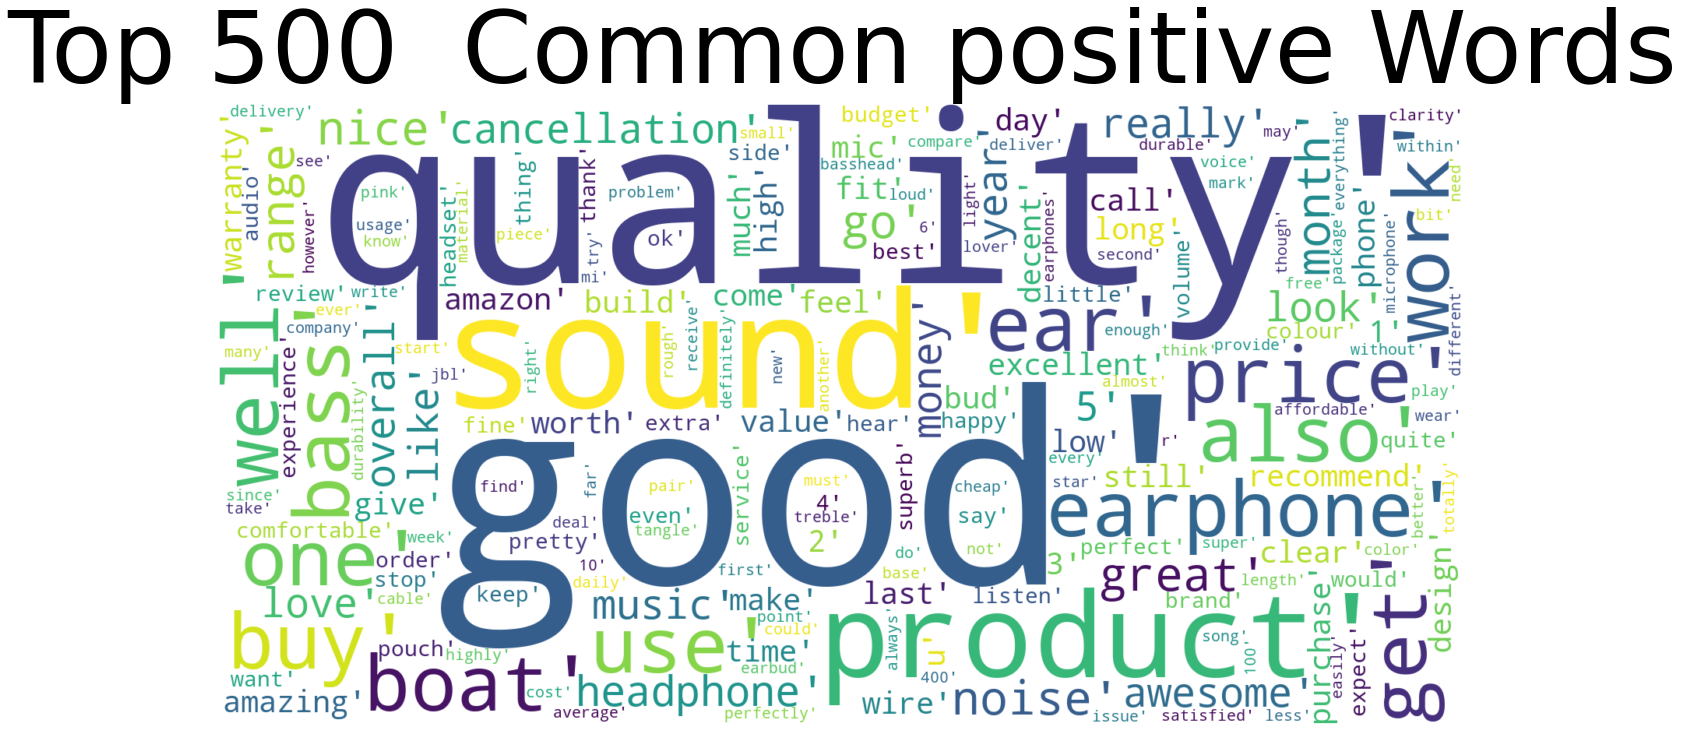

In [ ]:
most_common = nltk.FreqDist(words_list).most_common(500)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(most_common))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 500 Common positive Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

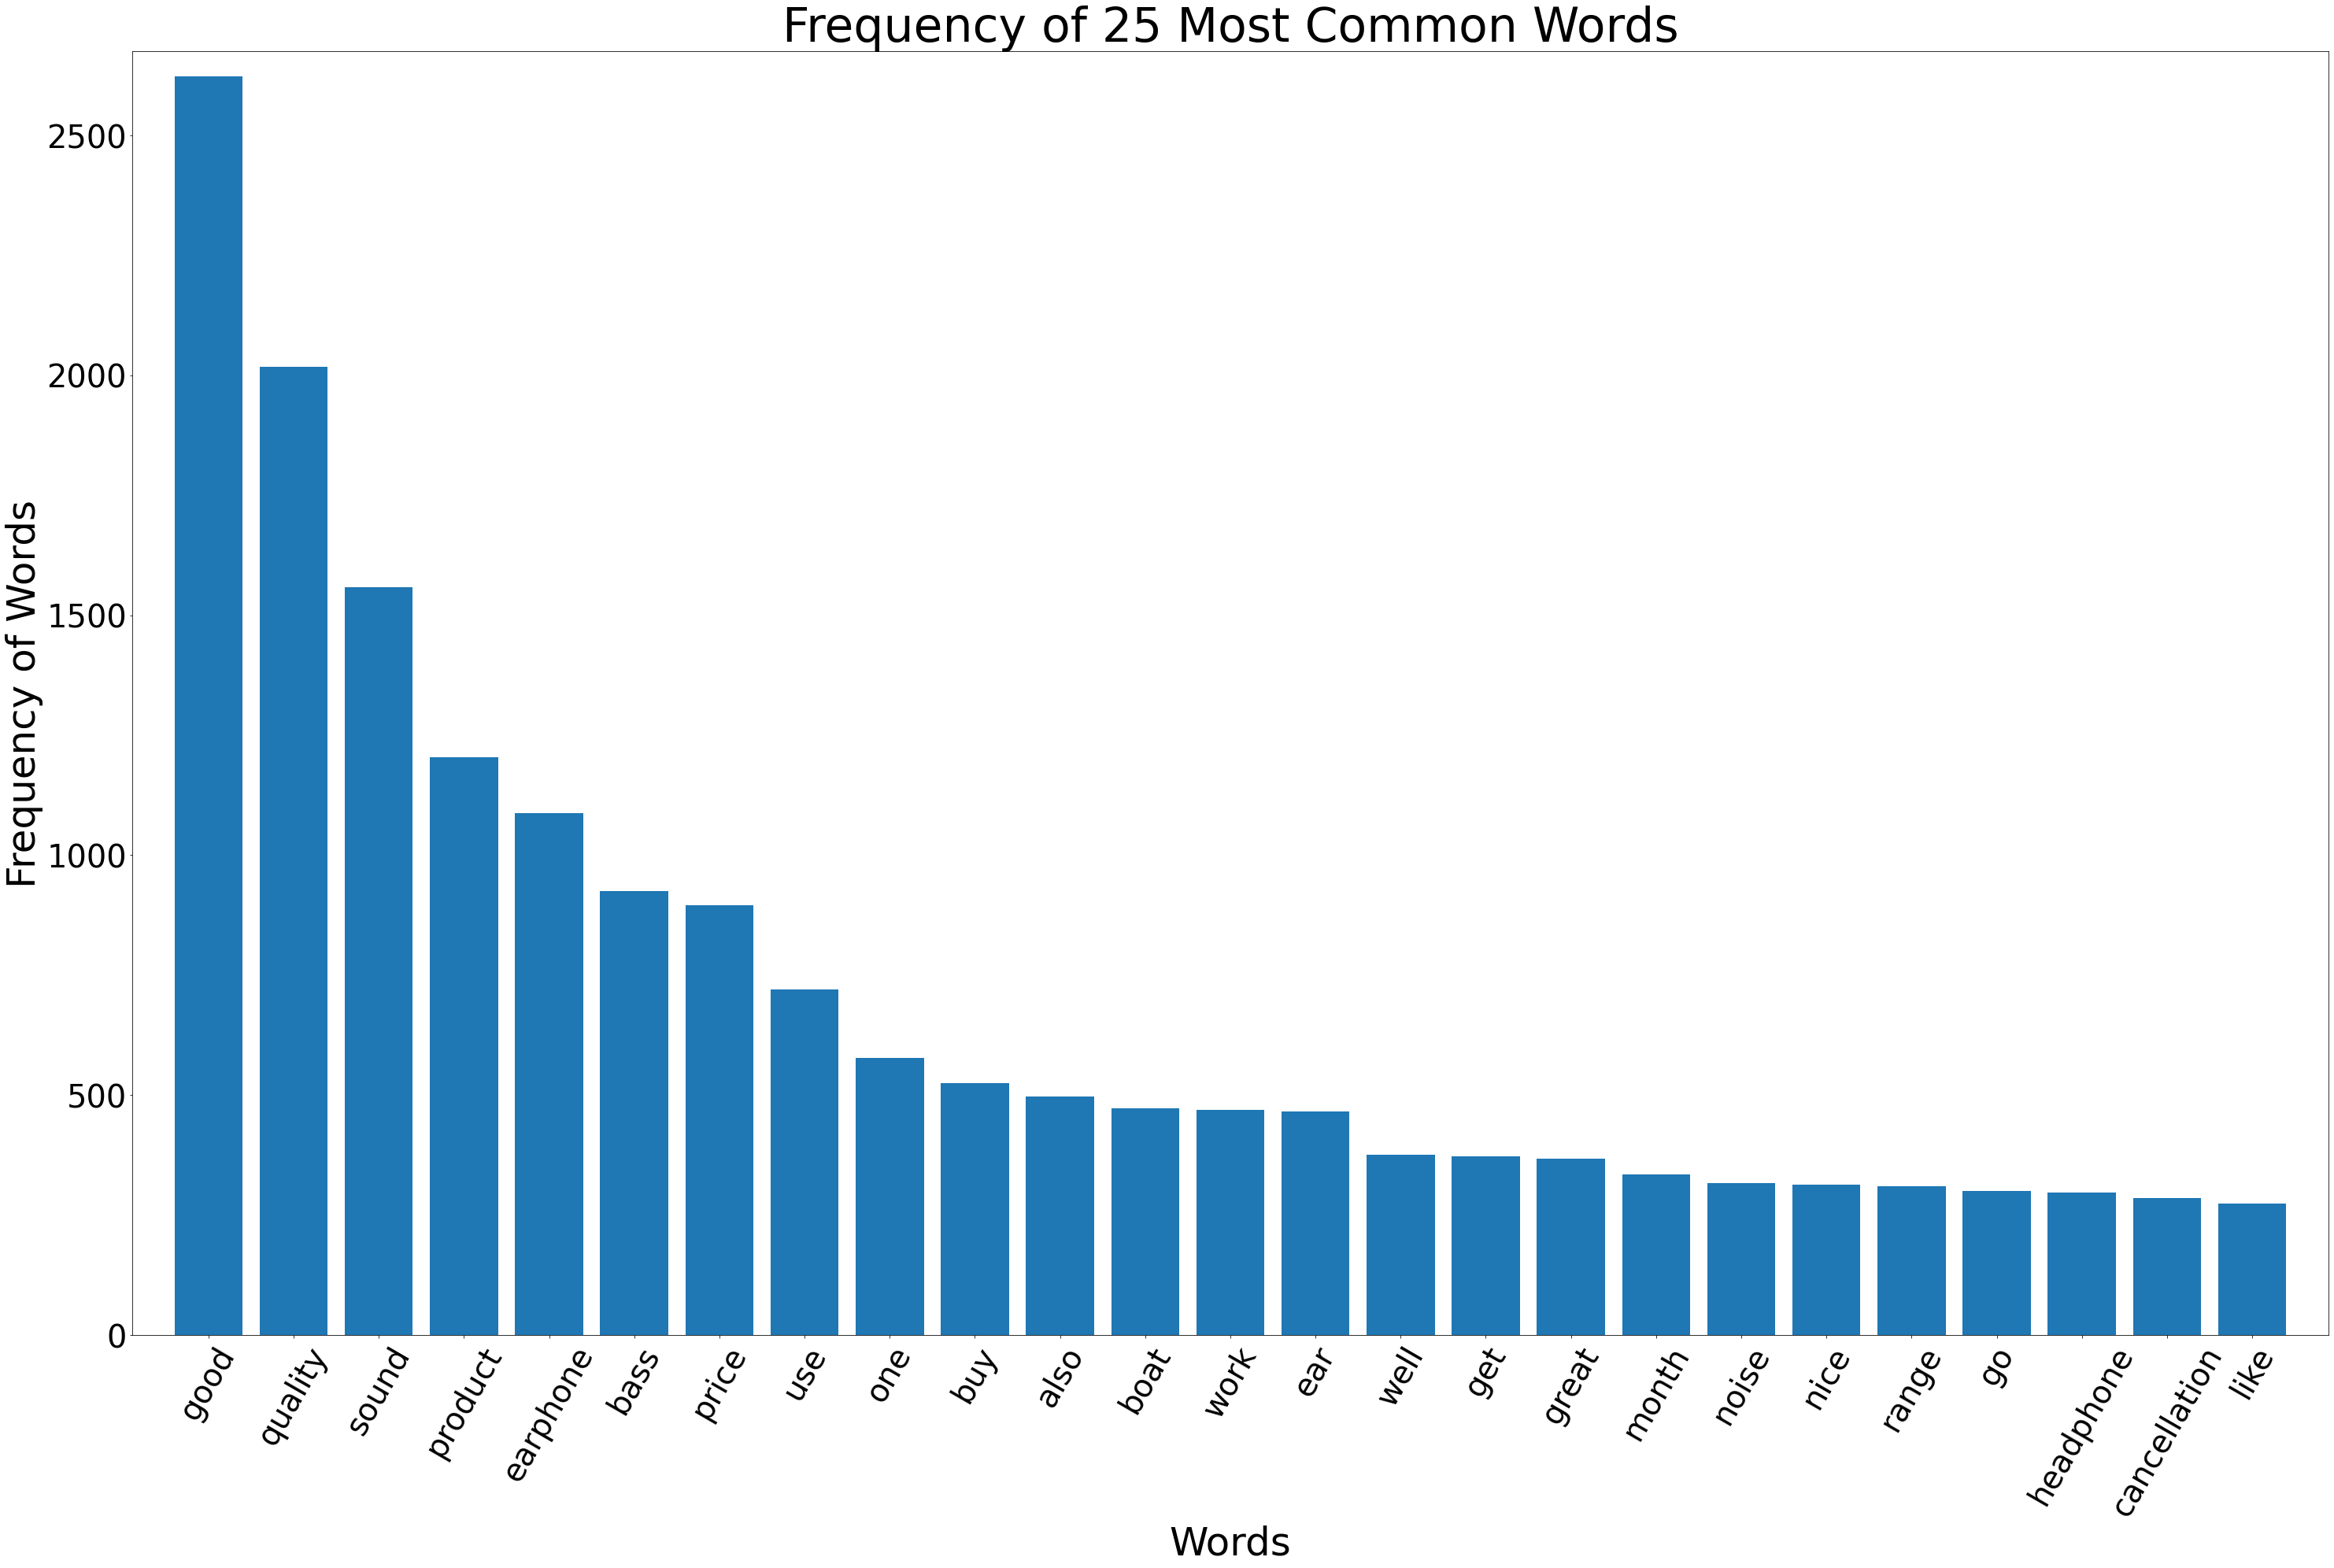

In [ ]:
mostcommon_small = nltk.FreqDist(words_list).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df =25, max_features=5000, use_idf=True)
tfidf = tfidf_vectorizer.fit_transform(positive_reviews.clean_texts)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
doc_term_matrix_tfidf = pd.DataFrame(tfidf.toarray(), columns=list(tfidf_feature_names))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [ ]:
nmf = NMF(n_components=10, random_state=0, alpha=.1, init='nndsvd').fit(tfidf)
display_topics(nmf, tfidf_feature_names, 10)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,


Topic 0:
quality sound build also awesome excellent superb wire like love
Topic 1:
earphone boat one get buy go amazing year really use
Topic 2:
product boat excellent buy also happy really amazon thank delivery
Topic 3:
good overall headphone quality bass one budget use look base
Topic 4:
work month use one stop still last side fine year
Topic 5:
money value worth well look long comfortable still totally use
Topic 6:
ear fit bud comfortable phone extra design well get come
Topic 7:
price range decent worth point definitely headphone low pretty expect
Topic 8:
nice overall also worth buy sound really colour design warranty
Topic 9:
bass noise cancellation great music also overall lover listen ok


In [ ]:
words = negative_reviews.clean_texts
words_list = []
for i in words:
  words_list+=i.split()
print(words_list[:1000])

['purchase', 'boat', 'earphone', 'month', 'ago', 'share', 'experience', 'product', 'build', 'quality', 'build', 'quality', 'awesome', 'look', 'premium', 'hand', 'hold', 'hand', 'also', 'light', 'weight', 'product', 'sound', 'quality', 'sound', 'quality', 'good', 'work', 'well', 'soft', 'melody', 'song', 'personal', 'experience', 'length', 'come', 'long', 'size', 'cable', 'cool', 'thing', 'like', 'one', 'thing', 'like', 'come', 'strap', 'tangle', 'cable', 'ear', 'comfort', 'get', 'fit', 'easily', 'ear', 'durability', 'depend', 'kind', 'user', 'protective', 'towards', 'stuff', 'maybe', 'last', 'long', 'product', 'con', 'come', 'dedicated', 'microphone', 'work', 'ok', 'ok', 'still', 'noise', 'call', 'travel', 'satisfied', 'noise', 'cancellation', 'mike', 'satisfy', 'bass', 'quality', 'work', 'average', 'get', 'inside', 'get', 'earphone', 'paperwork', 'come', 'one', 'year', 'warranty', 'activate', 'call', 'give', 'number', 'guess', 'also', 'get', 'two', 'pair', 'additional', 'ear', 'protec

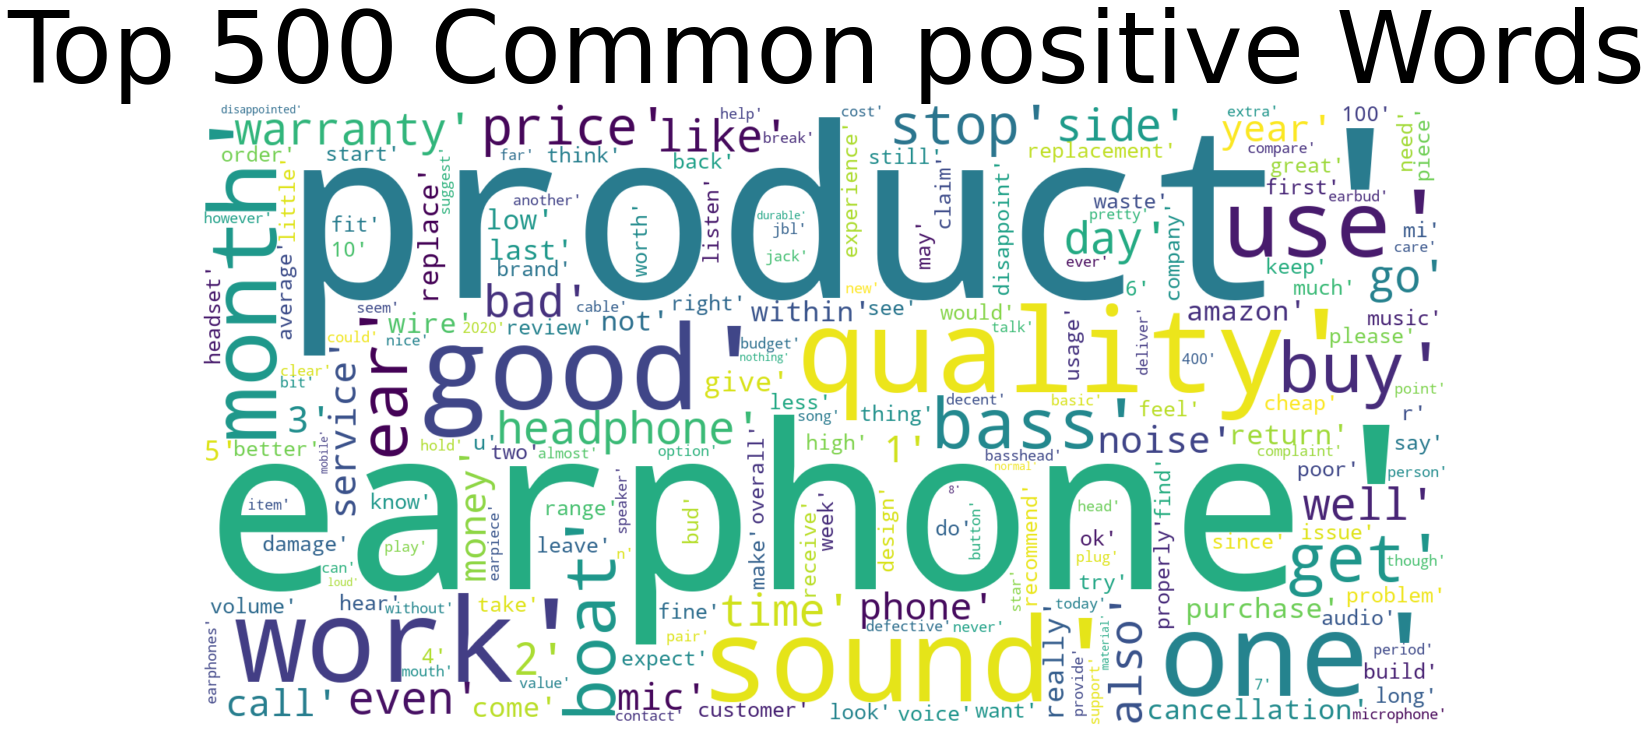

In [ ]:
most_common = nltk.FreqDist(words_list).most_common(500)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(most_common))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 500 Common positive Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

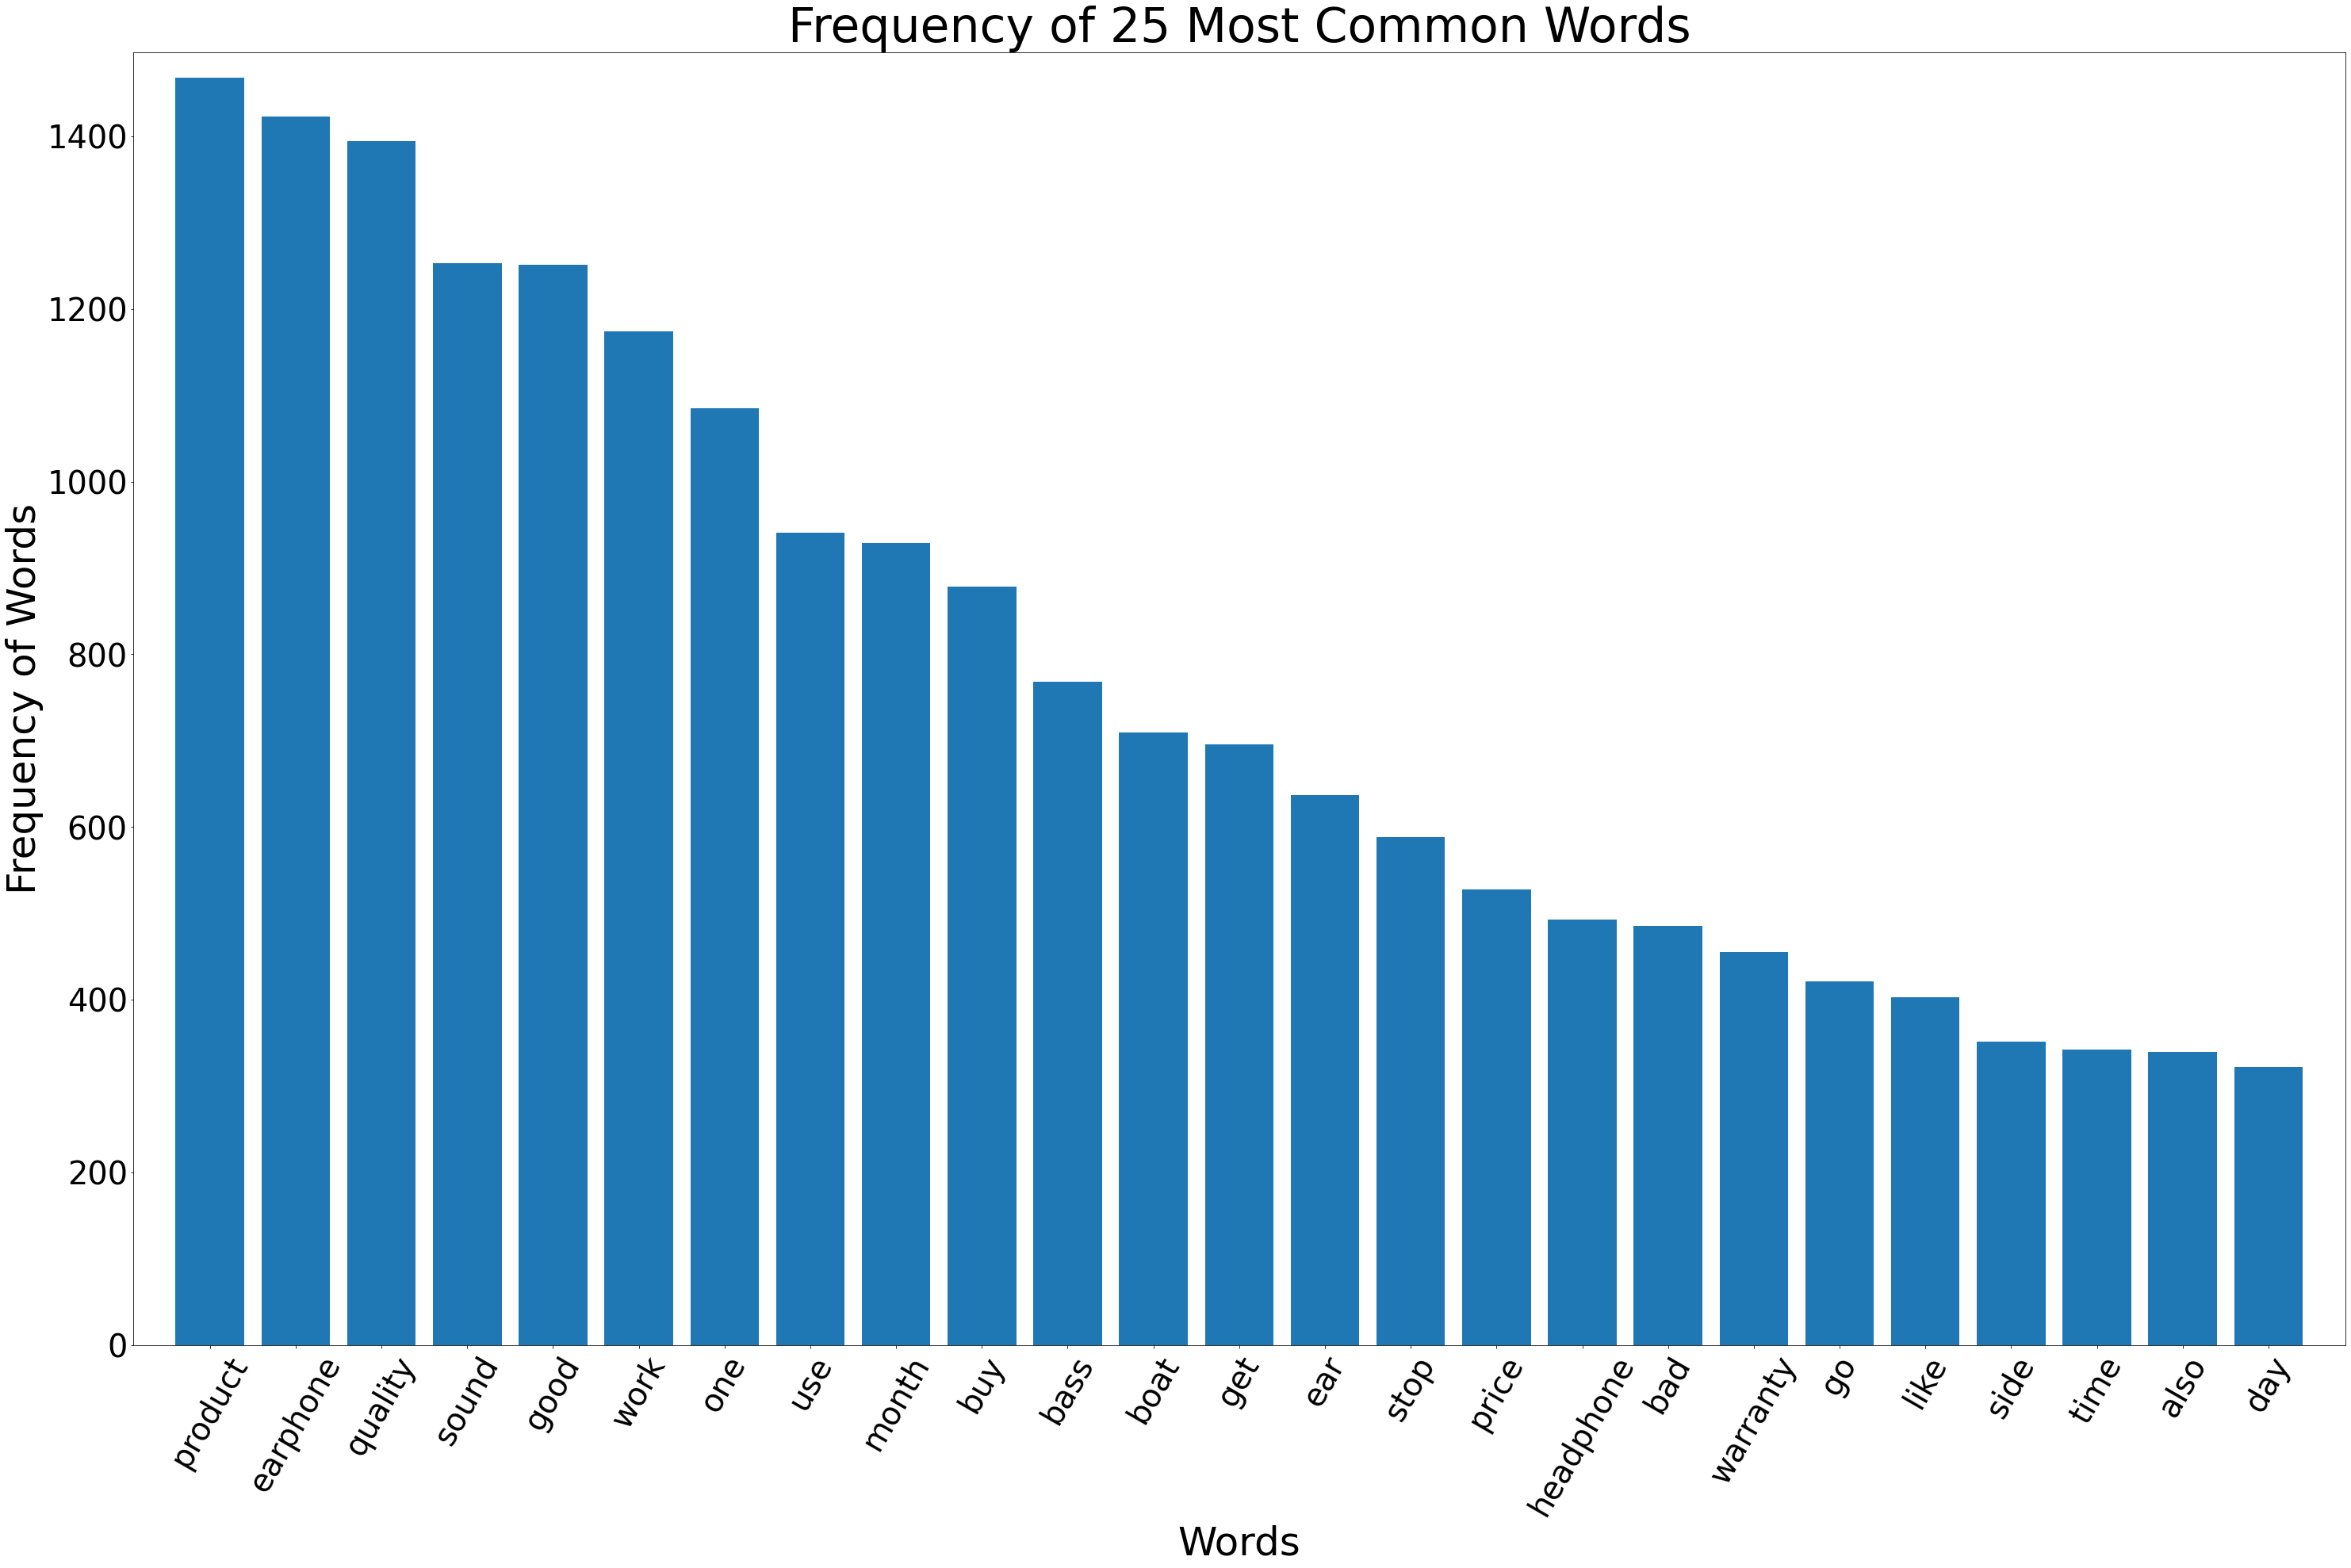

In [ ]:
mostcommon_small = nltk.FreqDist(words_list).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df =25, max_features=5000, use_idf=True)
tfidf = tfidf_vectorizer.fit_transform(negative_reviews.clean_texts)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
doc_term_matrix_tfidf = pd.DataFrame(tfidf.toarray(), columns=list(tfidf_feature_names))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [ ]:
nmf = NMF(n_components=10, random_state=0, alpha=.1, init='nndsvd').fit(tfidf)
display_topics(nmf, tfidf_feature_names, 10)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,


Topic 0:
ear phone one use fit bud good time plug like
Topic 1:
work stop month one side within day purchase leave last
Topic 2:
product amazon return receive bad like time purchase replacement boat
Topic 3:
earphone boat use one wire get come buy go mi
Topic 4:
quality sound poor bad build wire cheap low good also
Topic 5:
headphone use boat like last go buy good get one
Topic 6:
warranty service customer get boat replacement year claim replace care
Topic 7:
buy money waste bad please value total do not ever
Topic 8:
mic not hear call voice mouth person do can hold
Topic 9:
bass good price noise cancellation range go great high expect
